In [1]:
import json
import numpy as np

#### Create key_list

In [15]:
KEY_DICT = {
        'sale_contract': {"replace_key": ["contract_no", 
                                        "contract_date", 
                                        "seller_company", 
                                        "seller_address", 
                                        "buyer_company",
                                        "specifications",
                                        "quantity",
                                        "unit_price",
                                        "total_value",
                                        "time_of_shipment",],
                        "label": ["contract_no", 
                                        "contract_date", 
                                        "seller_company", 
                                        "seller_address", 
                                        "buyer_company",
                                        "quantity",
                                        "unit_price",
                                        "total_value",
                                        "time_of_shipment",]
                         } ,
        'bill_of_lading': {"replace_key": ["bill_id", 
                                        "company1.1", "company1.2", "address1", 
                                        "company2", "address2",
                                        "code1", "code2", "code3",
                                        "place_of_receipt", "place_of_delivery",
                                        "ocean_vessel", "voyage_no", "flag",
                                        "port_of_loading", "port_of_discharge",
                                        "con_no1", "con_no2", "con_no3", "con_no4", "con_no5",
                                        "bale_quantity", "con_num1", "con_num2", "con_num3", "con_num4", "con_num5",
                                        "con_mark1", "con_mark2", "con_mark3", "con_mark4", "con_mark5",
                                        "gross_weight", "measurement", "con_quantity", "text_con_quantity", 
                                        "country1", "tel1", "fax1", "name_contact1", "ein_tax1",
                                        "country2", "tel2", "fax2", "name_contact2", "gmail2",
                                        "freight_prepaid_at", "place_of_issue", "date"
                                        ],
                        "label": ["bill_id", 
                                        "company1", "address1", 
                                        "company2", "address2",
                                        "place_of_receipt", "place_of_delivery",
                                        "ocean_vessel", "voyage_no", "flag",
                                        "port_of_loading", "port_of_discharge",
                                        "container_no",  "container_num","container_mark",
                                        "gross_weight", "measurement", "container_quantity", "bale_quantity",
                                        "freight_prepaid_at", "place_of_issue", "date"
                                        ],
                          } ,
        'commercial_invoice':  {"replace_key": ["seller_company", "seller_address", "seller_tel", "seller_fax",
                                                "buyer_company", "buyer_address",
                                                "invoice_id", "invoice_date",
                                                "product", "quantity", "unit_price", "amount",
                                                "contract_no",
                                                "loading_port", "discharge_port",
                                                "sailing_date"],
                                "label": ["seller_company", "seller_address", "seller_tel", "seller_fax",
                                                "buyer_company", "buyer_address",
                                                "invoice_id", "invoice_date",
                                                "product", "quantity", "unit_price", "amount",],
                                },
        'packing_list':  {"replace_key": ["seller_company", "seller_address", "seller_tel", "seller_fax",
                                        "buyer_company", "buyer_address", "buyer_tel", "buyer_fax",
                                        "invoice_id", "invoice_date", "product",
                                        "container_num1", "container_num2", "container_num3", "container_num4", "container_num5", "container_num6", "container_num7", "container_num8", "container_num9",
                                        "g_weight1", "g_weight2", "g_weight3", "g_weight4", "g_weight5", "g_weight6", "g_weight7", "g_weight8", "g_weight9",
                                        "n_weight1", "n_weight2", "n_weight3", "n_weight4", "n_weight5", "n_weight6", "n_weight7", "n_weight8", "n_weight9",
                                        "bale1", "bale2", "bale3", "bale4", "bale5", "bale6", "bale7", "bale8", "bale9",
                                        "contract_no",
                                        "total_g", "total_n", "total_bale", "container_quantity"],
                                "label": ["seller_company", "seller_address", "seller_tel", "seller_fax",
                                        "buyer_company", "buyer_address", "buyer_tel", "buyer_fax",
                                        "invoice_id", "invoice_date",
                                        "product", "container_num", "g_weight", "n_weight", "bale", "contract_no",
                                        "total_g", "total_n", "total_bale", "container_quantity"],
                                } ,
        "score_table": {"replace_key" : ["last_name", "first_name", "birth", "province", "score", "grade"],
                        "label" :       ["last_name", "first_name", "birth", "province", "score", "grade"],}
        }

with open("/home/phung/AnhHung/data_gen/GenFromOdt/key_dict.json", "w", encoding="utf-8") as f:
    json.dump(KEY_DICT, f, ensure_ascii=False, indent="\t")


In [ ]:
with open("./key_dict.json", "r", encoding="utf-8") as f:
    data=json.load(f)
data

In [ ]:
with open("./key_dict2.json", "r", encoding="utf-8") as f:
    data=json.load(f)
data

#### Load yml

In [60]:
import yaml

def load_yaml(file_path):
    with open(file_path, 'r') as file:
        data = yaml.safe_load(file)
    return data

# Ví dụ sử dụng
file_path = './config/kie.yml'  # Đường dẫn đến tệp YAML
data_dict = load_yaml(file_path)



In [62]:
data_dict['label_list'] is None

True

#### Edit txt files

In [18]:
import random
txt_file = "./data/vietnamese_name_2_word.txt"

with open(txt_file, "r") as f:
    words = [x.replace("\n", "") for x in f.readlines()]
len(words)

5075

In [17]:
new_words = []
for word in words:
    if word in new_words:
        continue
    new_words.append(word)
len(new_words)

453

'Khôi Ðồng Huân Chương Khai'

In [10]:

with open("./data/vietnamese_name_1_word.txt", "w", encoding= "utf-8") as f:
    for x in new_words:
        f.write(x)
        f.write("\n")
    # words = [x.replace("\n", "") for x in f.readlines()]

#### Gendata

In [2]:
import random
def generate_code_string(code_temp):
    letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    numbers = '0123456789'

    string_value =[]
    for char in code_temp:
        if char == "T":
            string_value.append(random.choice(letters))
        elif char == "N":
            string_value.append(random.choice(numbers))
        else:
            string_value.append(char)
    code_string = ''.join(string_value)
    return code_string

generate_code_string("TNNT")

'C28Q'

In [3]:
from faker import Faker
import copy
fake = Faker()


In [530]:
type(round(random.randint(1,5), 1))

int

In [527]:
fake.street_address() + ", " + fake.city() + ", " + fake.country()

'126 Randolph Path, Cruzview, United States Virgin Islands'

In [241]:
def gen_add_info(add_temp, max_len=20, upper=True):
    fake = Faker()
    new_add = add_temp
    while new_add == add_temp or len(new_add) > max_len:
        new_add = add_temp
        if "(address)" in add_temp:
            if upper:
                new_add = new_add.replace("(address)", fake.address().upper().replace("\n"," "))
            else:
                new_add = new_add.replace("(address)", fake.address().replace("\n"," "))
        if "(country)" in add_temp:
            if upper:
                new_add = new_add.replace("(country)", fake.country().upper())
            else:
                new_add = new_add.replace("(country)", fake.country())
        if "(city)" in add_temp:
            if upper:
                new_add = new_add.replace("(city)", fake.city().upper())
            else:
                new_add = new_add.replace("(city)", fake.city())
        if "(company)" in add_temp:
            if upper:
                new_add = new_add.replace("(company)", fake.company().upper())
            else:
                new_add = new_add.replace("(company)", fake.company())
        if "(name)" in add_temp:
            if upper:
                new_add = new_add.replace("(name)", fake.name().upper())
            else:
                new_add = new_add.replace("(name)", fake.name())
        if "(email)" in add_temp:
            if upper:
                new_add = new_add.replace("(email)", fake.email().upper())
            else:
                new_add = new_add.replace("(email)", fake.email())
    return new_add
print(gen_add_info("(address)", max_len = 70, upper = False))

226 Anita Wells Suite 355 Bishopport, CA 77896


In [248]:
words = np.loadtxt("../SynthText/dataset-generator/words.txt", dtype=np.dtype(str), delimiter="\n")
with open("../SynthText/dataset-generator/words.txt", 'r') as file:
    words = np.array(file.read().splitlines(), dtype=np.dtype(str))
words

array(['a', 'AAA', 'AAAS', ..., 'Zulu', 'Zurich', 'zygote'], dtype='<U22')

In [207]:
import inflect

def convert_number_to_text(number):
    p = inflect.engine()
    text = p.number_to_words(number).upper()
    return text

# Example usage
number = 22
text = convert_number_to_text(number)
print(type(text))


<class 'str'>


In [335]:
def multiply_strings(x, y):
    # Convert strings to numerical values
    x_value = float(x.replace(',', ''))
    y_value = float(y.replace(',', ''))
    
    # Perform multiplication
    result = x_value * y_value
    
    # Format the result back into string format
    result_string = "{:,.2f}".format(result)
    
    return result_string

multiply_strings("{:,.3f}".format(random.randint(1, 1000)), "{:,.2f}".format(random.randint(1, 500)))

'344,871.00'

In [303]:
def generate_random_words(min_len = 5, max_len = 50):
    fake = Faker()
    words_list = [fake.word() for i in range(random.randint(1, 100))]
    words = " ".join(words_list)
    while len(words) < min_len or len(words) > max_len:
        words_list = [fake.word() for i in range(random.randint(1, 100))]
        words = " ".join(words_list)
    return words
generate_random_words(min_len = 5, max_len = 50)

'appear address tell treat return I'

In [390]:
x = round(random.uniform(1, 500), 3)
"{:,.3f}".format(x)

'164.580'

In [16]:
from datetime import datetime, timedelta

start_date = datetime(2000, 1, 1)
end_date = datetime(2005, 1, 1)

random_date = start_date + random.random() * (end_date - start_date)
date_string = random_date.strftime("%d/%m/%Y")
# print((start_date + random.random() * (end_date - start_date)).strftime("%d/%m/%Y"))
date_string

'28/11/2001'

In [17]:
len('Hoang Lien Son')

14

In [13]:
import pandas as pd

# Specify the path to the XLS file
file_path = "./data/address_list.csv"

# Load the XLS file into a DataFrame
df = pd.read_csv(file_path)
province_list = []
for x in df['Province']:
    if x not in province_list:
        province_list.append(x)
len(province_list)  

63

In [5]:
from lorem_text import lorem
lorem.words(100)

'earum accusantium atque numquam quis hic quidem ex id sunt enim aliquam fugit ut quas natus qui ab dicta quae animi suscipit laboriosam fugiat unde eveniet ullam quia maiores velit fuga nulla neque tempora cumque molestiae voluptate tenetur ipsum doloribus sed facilis deleniti eum eos at explicabo itaque assumenda nobis vitae dignissimos quod architecto excepturi pariatur repudiandae minima doloremque totam alias voluptatem a consequatur rerum voluptatum laborum impedit optio iure facere amet quibusdam ratione eligendi exercitationem incidunt odio quam iusto soluta possimus blanditiis accusamus ea iste vero voluptatibus consectetur temporibus rem praesentium error beatae sequi corporis sapiente inventore ipsam reprehenderit'

### Split pdf files

In [90]:
from PyPDF2 import PdfFileReader, PdfFileWriter
import os
def spiltpage_pdf(pdf_path):
    name, ext = os.path.splitext(pdf_path)
    pdf_reader = PdfFileReader(pdf_path)
    numPages = pdf_reader.numPages
    for page_number in range(numPages):
        output_pdf_path = f"{name}_{page_number}.pdf"
        pdf_writer = PdfFileWriter()
        pdf_writer.addPage(pdf_reader.getPage(page_number))
        
        with open(output_pdf_path, "wb") as output_pdf:
            pdf_writer.write(output_pdf)
    return numPages



### Table from pdf

In [91]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw
from src.image_convert import bytes2pillow
import fitz
import PyPDF2
import camelot
import copy
import pandas as pd
import numpy as np
import os

In [92]:
#Show img
def plot_img(img,size = (10,10)):
    plt.figure(figsize=size)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

#Vẽ bounding box
def bounding_box(img, x1, y1, x2, y2, line_width = 2):
    img = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), line_width)
    return img

def draw_rectangle(image, x1, y1, x2, y2, line_width = 2):
    # Create an ImageDraw object
    draw = ImageDraw.Draw(image)

    # Draw the rectangle
    rectangle = [(x1, y1), (x2, y2)]
    draw.rectangle(rectangle, outline='red', width=line_width)

    return image


def find_table_positions(pdf_file_path):
    table_positions = []
    
    with open(pdf_file_path, 'rb') as file:
        reader = PyPDF2.PdfFileReader(file)
        
        for page_number in range(reader.numPages):
            page = reader.getPage(page_number)
            content = page.extractText()
            
            # Perform table detection logic here
            # You can use regular expressions or other techniques to identify table patterns
            
            # Example: Check if the page contains the word 'Table'
            if 'Table' in content:
                table_positions.append(page_number)
    
    return table_positions

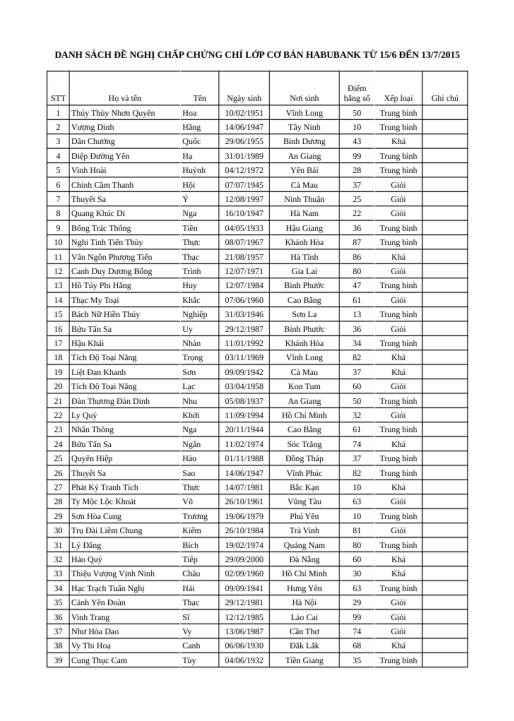

In [212]:

# pdf_path = "/home/phung/AnhHung/data_gen/GenFromOdt/output/packing_list.pdf"
# page_1 = "/home/phung/AnhHung/data_gen/GenFromOdt/output/packing_list.jpg"

pdf_path = "/home/phung/AnhHung/data_gen/GenFromOdt/temp.pdf"
page_1 = "/home/phung/AnhHung/data_gen/GenFromOdt/output/table_6_0000_page_00.jpg"
page_2 = "/home/phung/AnhHung/data_gen/GenFromOdt/output/table_6_0000_page_01.jpg"

# image1 = cv2.cvtColor(cv2.imread(page_1), cv2.COLOR_BGR2RGB)
# image2 = cv2.cvtColor(cv2.imread(page_2), cv2.COLOR_BGR2RGB)

image1 = Image.open(page_1)
image2 = Image.open(page_2)


pdf_doc = fitz.open(pdf_path)
for j, page in enumerate(pdf_doc):
    pixmap = page.get_pixmap()
    image = bytes2pillow(pixmap.tobytes())

    plot_img(image, (13, 13))
    break

In [213]:
tables = camelot.read_pdf(pdf_path, flavor = "lattice", pages='2')
# tables = camelot.read_pdf(pdf_path, flavor = "stream", pages='all', row_tol = 50)

print("Total tables extracted:", tables.n)

Total tables extracted: 3


In [231]:
def check_same_length(list_of_lists):
    length = len(list_of_lists[0])
    return all(len(lst) == length for lst in list_of_lists[1:])

def merge_boxes(box_list):
    # Convert the list to a NumPy array
    box_array = np.array(box_list)

    # Calculate the minimum and maximum values
    min_x1 = np.min(box_array[:, 0])
    max_x2 = np.max(box_array[:, 2])
    min_y1 = np.min(box_array[:, 1])
    max_y2 = np.max(box_array[:, 3])

    return [min_x1, min_y1, max_x2, max_y2]

def extract_table(table, h):
    lines = table.cells
    rows = []
    cells = []
    for i, boxes in enumerate(lines):
        new_line = []
        # print(len(cell))
        for j, box in enumerate(boxes):
            true_box = [int(box.x1), int(h-box.y2) , int(box.x2), int(h-box.y1)]
            new_line.append(true_box)
            cells.append(true_box)
            # break
        rows.append(new_line)

    
    if check_same_length(rows):
        columns = [[] for i in range(len(rows[0]))]
        for row in rows:
            for i, cell in enumerate(row):
                columns[i].append(cell)
    else:
        columns = []


    return {
        "row" : [merge_boxes(row) for row in rows],
        "cell" : cells,
        "table" : [merge_boxes(cells)],
        "column" : [merge_boxes(column) for column in columns],
    }

def two_boxes_in_row(table1, table2, max_error = 10, box_type = 'table'):
    cen1 = [(table1[2]+table1[0])/2, (table1[3]+table1[1])/2]
    cen2 = [(table2[2]+table2[0])/2, (table2[3]+table2[1])/2]
    distance_x = abs(cen1[0] - cen2[0])
    distance_y = abs(cen1[1] - cen2[1])
    w1, h1 = abs(table1[2] - table1[0]), abs(table1[3] - table1[1])
    w2, h2 = abs(table2[2] - table2[0]), abs(table2[3] - table2[1])
    
    #Check if same column
    if box_type != 'row': 
        if abs(table1[0]-table2[0]) <= max_error and abs(table1[2]-table2[2]) <= max_error and abs(h1 + h2 - 2*distance_y) <= max_error:
            return True

    #Check if same row
    if box_type != 'column': 
        if abs(table1[1]-table2[1]) <= max_error and abs(table1[3]-table2[3]) <= max_error and abs(w1 + w2 - 2*distance_x) <= max_error:
            return True

    return False


def merge_table_element(tables_list, max_error = 10, box_type = 'table'):
    merge_flag = True
    while merge_flag:
        merge_flag = False
        for i, table1 in enumerate(tables_list):
            for j, table2 in enumerate(tables_list):
                if i == j:
                    continue
                if two_boxes_in_row(table1, table2, max_error = 10, box_type = box_type):
                    tables_list[i] = merge_boxes([table1, table2])
                    del tables_list[j]
                    merge_flag = True
                    break
            if merge_flag == True:
                
                break
    return tables_list




In [232]:
# numPages = spiltpage_pdf("temp.pdf")
pdf_doc = fitz.open("temp.pdf")

for j, page in enumerate(pdf_doc):
    if j == 0:
        continue
    pixmap = page.get_pixmap()
    image = bytes2pillow(pixmap.tobytes())
    w, h = image.size

    shape_dict = {}
    tables = camelot.read_pdf("temp.pdf", flavor = "lattice", pages=f'{j+1}')
    for table in tables:
        table_dict = extract_table(table, h)
        for table_key in table_dict:
            if table_key in shape_dict:
                shape_dict[table_key] += table_dict[table_key]
            else:
                shape_dict[table_key] = table_dict[table_key]
    shape_dict['table'] = merge_table_element(shape_dict['table'], max_error = 10, box_type = 'table')
    shape_dict['column'] = merge_table_element(shape_dict['column'], max_error = 10, box_type = 'column')
    shape_dict['row'] = merge_table_element(shape_dict['row'], max_error = 10, box_type = 'row')

    


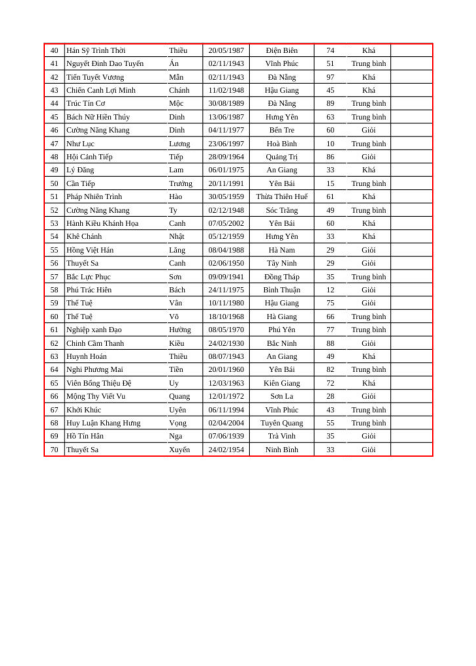

In [233]:
image_copy = image2.copy()

for box in shape_dict['table']: 
    image_copy = draw_rectangle(image_copy, int(box[0]), int(box[1]), int(box[2]), int(box[3]), line_width = 2)

plot_img(image_copy, (12, 12))

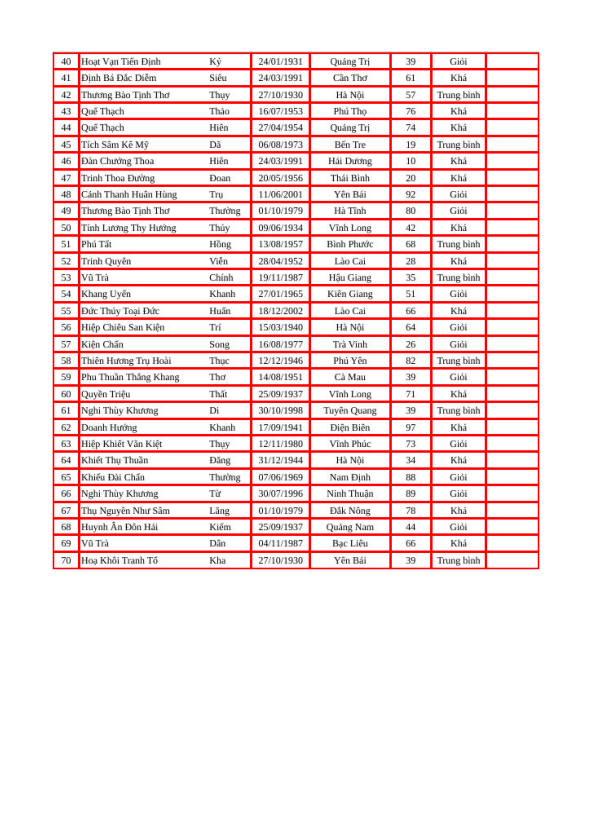

In [107]:
image_copy = image1.copy()
w, h = image_copy.size

lines = tables[0].cells

rows = []
cells = []

for i, boxes in enumerate(lines):

    new_line = []
    # print(len(cell))
    for j, box in enumerate(boxes):
        
        image_copy = draw_rectangle(image_copy, int(box.x1), int(h-box.y1), int(box.x2), int(h-box.y2), line_width = 2)
        true_box = [int(box.x1), int(h-box.y1), int(box.x2), int(h-box.y2)]
        new_line.append(true_box)
        cells.append(true_box)
        # break
    rows.append(new_line)
    # break
    
plot_img(image_copy, (15, 15))

In [121]:
image_copy = image1.copy()

w, h = image_copy.size

res = extract_table(tables[0], w, h)
res

{'row': [[56, 139, 652, 91],
  [56, 159, 652, 139],
  [56, 179, 652, 159],
  [56, 200, 652, 179],
  [56, 220, 652, 200],
  [56, 241, 652, 220],
  [56, 261, 652, 241],
  [56, 281, 652, 261],
  [56, 302, 652, 281],
  [56, 322, 652, 302],
  [56, 343, 652, 322],
  [56, 363, 652, 343],
  [56, 383, 652, 363],
  [56, 404, 652, 383],
  [56, 424, 652, 404],
  [56, 445, 652, 424],
  [56, 465, 652, 445],
  [56, 485, 652, 465],
  [56, 506, 652, 485],
  [56, 526, 652, 506],
  [56, 547, 652, 526],
  [56, 567, 652, 547],
  [56, 587, 652, 567],
  [56, 608, 652, 587],
  [56, 628, 652, 608],
  [56, 649, 652, 628],
  [56, 669, 652, 649],
  [56, 689, 652, 669],
  [56, 710, 652, 689],
  [56, 730, 652, 710],
  [56, 751, 652, 730],
  [56, 771, 652, 751],
  [56, 791, 652, 771],
  [56, 812, 652, 791],
  [56, 832, 652, 812],
  [56, 853, 652, 832],
  [56, 873, 652, 853],
  [56, 893, 652, 873],
  [56, 914, 652, 893],
  [56, 935, 652, 914]],
 'cell': [[56, 139, 88, 91],
  [88, 139, 299, 91],
  [299, 139, 371, 91],

In [47]:
x = [1, 2, 3, 4, 5]
x + [1, 2]

[1, 2, 3, 4, 5, 1, 2]

/tmp/ipykernel_2991986/741030849.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[1], kind='grid').show()


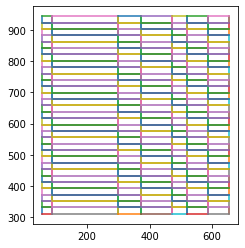

In [45]:
camelot.plot(tables[1], kind='grid').show()

In [74]:
df = tables[0].df
# df.to_csv("./output/temp.csv")
df

,0,1,2,3,4,5,6,7
0,,DANH SÁCH ĐỀ NGHỊ CHẤP CHỨNG CHỈ LỚP CƠ BẢN HA...,,,,,,
1,STT,Họ và tên,Tên,Ngày sinh,Nơi sinh,Điểm\nbằng số,Xếp loại,Ghi chú
2,1\n2,Bằng Vy Phúc \nThoại Chấn Lợi Thắm,Hiên\nNinh,07/04/1992\n20/06/1993,Đắk Lắk\nHải Dương,25\n70,Khá\nTrung bình,
3,3\n4,Hiên Canh\nHàm Toản,Hoàng\nThảo,10/07/1975\n02/07/1957,Tiền Giang\nHà Tĩnh,40\n47,Giỏi\nGiỏi,
4,5\n6,Ninh Dã Thảo\nKhai Xuân,Phượng\nÝ,03/12/1969\n19/07/1981,Tuyên Quang\nNinh Bình,90\n41,Trung bình\nGiỏi,
5,7\n8,Khả Anh\nChế Ðài,Cảnh\nThiều,01/10/1982\n02/01/1950,Khánh Hòa\nHải Dương,42\n58,Trung bình\nGiỏi,
6,9\n10,Hoạt Trang\nChiêu Lân Ðăng Hợp,Uy\nNhã,20/12/1951\n23/01/1977,Nam Định\nĐồng Tháp,74\n74,Giỏi\nTrung bình,


#### Image to Pdf

In [22]:
from img2table.ocr import TesseractOCR
from img2table.document import Image

In [31]:

image_path = "/home/phung/AnhHung/temp/table/1.png"

# image = Image(image_path, 
#               detect_rotation=False)
# Instantiation of OCR
ocr = TesseractOCR(n_threads=1, lang="vie")

# Instantiation of document, either an image or a PDF
doc = Image(image_path)

# Table extraction
extracted_tables = doc.extract_tables(ocr=ocr,
                                      implicit_rows=False,
                                      borderless_tables=False,
                                      min_confidence=50)

tesseract 4.1.1
 leptonica-1.79.0
  libgif 5.1.9 : libjpeg 6b (libjpeg-turbo 2.0.6) : libpng 1.6.37 : libtiff 4.2.0 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.4.3 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


In [32]:
len(extracted_tables)

1

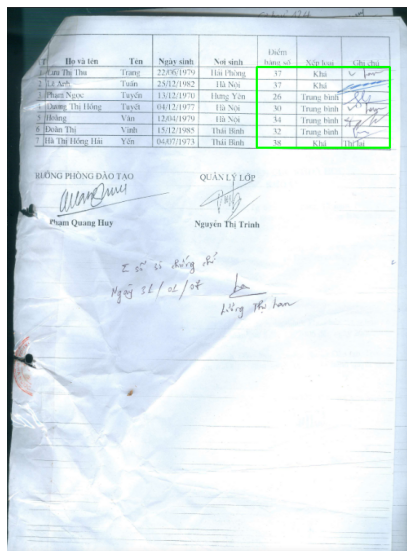

In [30]:
bbox = extracted_tables[0].bbox
x1 = int(bbox.x1)
y1 = int(bbox.y1)
x2 = int(bbox.x2)
y2 = int(bbox.y2)

image1 = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
# image1 = draw_rectangle(image1, x1, y1, x2, y2, line_width = 2)
image1 = bounding_box(image1, x1, y1, x2, y2, line_width = 2)
plot_img(image1)

The code supports creating data for the text detection problem and key information extraction from the odt file.

Steps to generate data:

- Create an .odt file (can use libre office): the text is in the form of \$(key1), \$(key2),... can be replaced
- Generate replacement information: key_dict includes key_name:{replace_key:[key1, key2, ...], label:[...]}
- Setting the config file yml
- Run the file odt_to_kie.py or odt_to_labelme.py

Birth data:
- Text detection: includes image and json file loaded by Labelme tool
- Key information extraction: json file loaded by tool https://github.com/ndgnuh/relation-tagger

Load odt &rarr; Replace key &rarr; Save as pdf &rarr; Load pdf &rarr; Read texts, boxes &rarr; save as Text Detection or KIE

### Gen docx file

In [15]:
from docx import Document
from docx.shared import Inches
import random
from src.odt_convert import *
from docx.enum.table import WD_TABLE_ALIGNMENT, WD_ROW_HEIGHT_RULE
import os
from tqdm import tqdm
from lorem_text import lorem
import subprocess
from src.get_label import labelme_gen

from docx2pdf import convert
import yaml
import json
import os
import fitz
from odf import opendocument
from src.odt_convert import replace_text, gen_info, gen_dump_text
from src.image_convert import bytes2pillow
from src.pdf_extraction import spiltpage_pdf
from src.get_label import labelme_gen
from src.table_extraction import extract_table, merge_table_element
from tqdm import tqdm
import subprocess
import camelot

from pprint import pprint

In [60]:
def gen_dump_cols(row_len = 20, max_word = 6):
    return [lorem.words(random.randint(1, 3))] + [lorem.words(random.randint(1, max_word)) for i in range(row_len)]

def add_table_to_doc(document, max_row=30, max_col = 6, table_style = None):
    
    rows = random.randint(2, max_row)
    cols = random.randint(2, max_col)
    fake = Faker()

    table = document.add_table(rows=rows, cols=cols)

    
    # with open("./data/table_style_list.txt", "r") as f:
    #     table_styles = [x.replace('\n',"") for x in f.readlines()]
    # #Table config
    # # table_style = random.choice(table_styles)
    # table_style = table_styles[file_num]
    if table_style is not None:
        table.style = document.styles[table_style] 
    table.autofit = True
    table.alignment = random.choice([WD_TABLE_ALIGNMENT.CENTER, WD_TABLE_ALIGNMENT.LEFT])


    #Table content
    id_cols = [random.choice(["STT", "ID"])] + [f"{i+1:02d}" for i in range(rows)]
    phone_cols = [random.choice(["SĐT", "Phone number"])] + [random.choice([gen_code_string("NNNNNNNNNN"), gen_code_string("NNNNNNN-NNN"), gen_code_string("NNN NNNN NNN")]) for i in range(rows)]
    score_cols = [random.choice(["Điểm", "Score"])] + [str(random.randint(1,100)) for i in range(rows)]
    name_cols = [random.choice(["Họ và tên", "Last Name", "Full Name"])] + [gen_add_info("(name)", max_len=20, upper=False) for i in range(rows)]
    one_word_cols = [random.choice(["Tên", "Name"])] + [fake.word()[0].upper() + fake.word()[1:] for i in range(rows)]
    address_cols = [random.choice(["Địa chỉ", "Address"])] + [gen_add_info("(address)", max_len=80, upper=False) for i in range(rows)]
    country_cols = [random.choice(["Country", "Quốc tịch"])] + [gen_add_info("(country)", max_len=15, upper=False) for i in range(rows)]
    dump_words_cols = [generate_random_words(min_len=4, max_len=15)] + [generate_random_words(min_len=20, max_len=150) for i in range(rows)]
    type_cols = [random.choice(["Type", "Loại"])] + [random.choice(['A', 'B', 'C', 'D', 'E']) for i in range(rows)]

    full_table_info_dict = {
        "type1" : [id_cols, name_cols, one_word_cols, address_cols] + [gen_dump_cols(row_len = rows) for i in range(max_col-4)],
        "type2" : [id_cols, name_cols, country_cols, score_cols, type_cols] + [gen_dump_cols(row_len = rows) for i in range(max_col-5)],
        "type3" : [gen_dump_cols(row_len = rows, max_word = 20) for i in range(max_col)],
        "type4" : [id_cols, name_cols, one_word_cols, type_cols, phone_cols, address_cols] + [gen_dump_cols(row_len = rows) for i in range(max_col-6)],
        "type5" : [id_cols, name_cols, address_cols] + [gen_dump_cols(row_len = rows) for i in range(max_col-3)],
        "type6" : [name_cols, one_word_cols, type_cols] + [gen_dump_cols(row_len = rows) for i in range(max_col-3)],
    }
    
    table_col_size_dict={
        "type1" : [1/14, 1/5, 1/10, 1/3.5] + [(1-sum([1/14, 1/5, 1/10, 1/3.5]))/(max_col-4) for i in range(max_col-4)],
        "type2" : [1/14, 1/4, 1/6, 1/12, 1/12] + [(1-sum([1/14, 1/4, 1/6, 1/12, 1/12]))/(max_col-5) for i in range(max_col-5)],
        "type3" : [1/max_col for i in range(max_col)],
        "type4" : [1/14, 1/5, 1/10, 1/12, 1/6, 1/4] + [(1-sum([1/14, 1/5, 1/10, 1/12, 1/6, 1/4]))/(max_col-6) for i in range(max_col-6)],
        "type5" : [1/14, 1/5, 1/3.5] + [(1-sum([1/14, 1/5, 1/3.5]))/(max_col-3) for i in range(max_col-3)],
        "type6" : [1/5, 1/10, 1/12] + [(1-sum([1/5, 1/10, 1/12]))/(max_col-3) for i in range(max_col-3)],
    }

    random_key = random.choice(list(full_table_info_dict.keys()))
    full_table_info = full_table_info_dict[random_key]
    table_col_size = table_col_size_dict[random_key]
    if random_key == "type3":
        table_col_size= [1/(cols+0.5) for i in range(cols)]

    for row_id in range(rows):
        for col_id in range(cols):
            # try:
            table.rows[row_id].cells[col_id].text = full_table_info[col_id][row_id]
            table.rows[row_id].height_rule = WD_ROW_HEIGHT_RULE.AUTO
    
    for col_id in range(cols):
        table.columns[col_id].width = int(table_col_size[col_id]*5485130)
            
    # print("table_width = ", sum([table.columns[col_id].width for col_id in range(cols)]))
    return document

def add_para_to_doc(document):
    document.add_paragraph(lorem.words(random.randint(20, 150)), style = random.choice(['Normal', 'Body Text', 'Body Text 2', 'Body Text 3']))
    return document

def add_pic_to_doc(document, image_list):
    document.add_picture(random.choice(image_list), width=Inches(random.uniform(1, 3)))
    return document


In [55]:
image_dir = "/home/phung/AnhHung/data/background/negative_labelme"
image_list = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if "jpg" in filename]
len(image_list)

300

In [56]:
pdf_dir = "./output/pdf_files/"
docx_dir = "./output/docx_files/"


In [61]:
max_file = 5

for file_num in tqdm(range(max_file)):

    document = Document()

    with open("./data/table_style_list.txt", "r") as f:
        table_styles = [x.replace('\n',"") for x in f.readlines()]
    #Table config
    # table_style = random.choice(table_styles)
    table_style = table_styles[0]

    add_types = ["para", "pic", "table"]
    for i in range(1, 10):
        add_type = random.choice(add_types)
        if add_type == "para":
            document = add_para_to_doc(document)
        if add_type == "pic":
            document = add_pic_to_doc(document, image_list)
        if add_type == "table":
            document = add_table_to_doc(document, max_row=12, max_col = 6, table_style = table_style)
        document.add_paragraph("")

    # document.add_page_break()

    out_path = os.path.join(docx_dir, f"{file_num:04d}.docx")
    document.save(out_path)

100%|██████████| 5/5 [00:05<00:00,  1.07s/it]


In [33]:

# libreoffice --headless --convert-to pdf --outdir ./pdf_files/ ./docx_files/*.docx

# subprocess.run(['libreoffice', '--headless', '--convert-to', 'pdf', '--outdir', pdf_dir, f"{docx_dir}*.docx"], shell=True)

# # generate_pdf("docx_path.docx", "output_path")
# for docx_file in tqdm(os.listdir(docx_dir)):
#     docx_path = os.path.join(docx_dir, docx_file)
#     pdf_path = os.path.join(pdf_dir, f"{os.path.splitext(docx_file)[0]}.pdf")

#     #Save to pdf
#     subprocess.run(['unoconv', '--format=pdf', '-o', pdf_path, docx_path])
#     # subprocess.run(["unoconv", "-f", "pdf", "-o", pdf_path, docx_path])
#     # generate_pdf(docx_path, pdf_path)

In [64]:
# numPages = spiltpage_pdf("temp.pdf")
label_list=['table', 'column', 'row', 'cell']
for pdf_file in tqdm(os.listdir(pdf_dir)):
    pdf_path = os.path.join(pdf_dir, pdf_file)
    pdf_doc = fitz.open(pdf_path)
    pdf_name, _ = os.path.splitext(pdf_file)

    for j, page in enumerate(pdf_doc):
        pixmap = page.get_pixmap()
        image = bytes2pillow(pixmap.tobytes())
        w, h = image.size

        shape_dict = {}
        tables = camelot.read_pdf(pdf_path, flavor = "lattice", pages=f'{j+1}')
        for table in tables:
            table_dict = extract_table(table, h)
            for table_key in table_dict:
                if table_key not in label_list:
                    continue
                if isinstance(table_dict[table_key][0] , list):
                    if table_key in shape_dict:
                        shape_dict[table_key] += table_dict[table_key]
                    else:
                        shape_dict[table_key] = table_dict[table_key]
                else:
                    if table_key in shape_dict:
                        shape_dict[table_key].append(table_dict[table_key])
                    else:
                        shape_dict[table_key] = [table_dict[table_key]]

        if 'table' in shape_dict:
            shape_dict['table'] = merge_table_element(shape_dict['table'], max_error = 10, box_type = 'table')
        
        if 'column' in shape_dict:
            shape_dict['column'] = merge_table_element(shape_dict['column'], max_error = 10, box_type = 'column')

        if 'row' in shape_dict:
            shape_dict['row'] = merge_table_element(shape_dict['row'], max_error = 10, box_type = 'row')

        labelme_gen(shape_dict, 
                    image, 
                    f'{pdf_name}_page_{j:02d}', 
                    "./output/labelme/")

100%|██████████| 5/5 [00:07<00:00,  1.55s/it]


In [81]:
x = [[1,2], [3,5], [4,7]]

sum(y[1] for y in x)

14